In [1]:
import numpy as np
import sys
import os
import glob
import csv
import re
import time
import copy

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits import mplot3d

import sys
sys.path.append("..")

from sicm import io, plots, analysis, utils

%matplotlib inline
plt.style.use("seaborn") # plt.style.available

In [7]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"

## Cyclic Voltametry

In [8]:
# Locals
exp_name = "cv2"

In [9]:
files, date = io.get_files(datadir, exp_name)
result = io.load_result(files)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (7802,)


Text(0, 0.5, 'LineNumber')

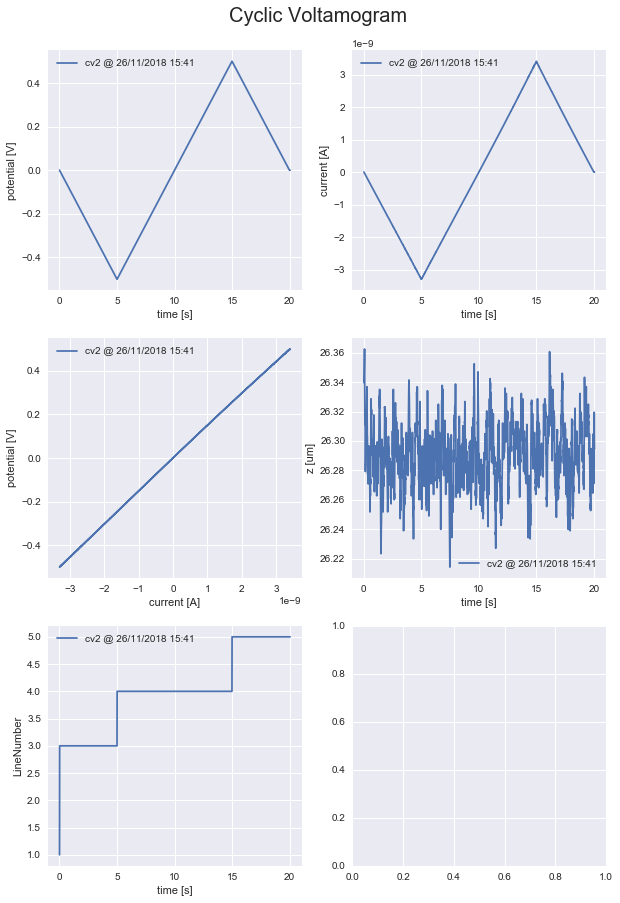

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
axs = axs.flatten()
fig.suptitle("Cyclic Voltamogram", size = 20, y = 0.92)

axs[0].plot(np.cumsum(result["dt(s)"]), result["V1(V)"])
axs[0].legend(["{} @ {}".format(exp_name, date)])
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("potential [V]")

axs[1].plot(np.cumsum(result["dt(s)"]), result["Current1(A)"])
axs[1].legend(["{} @ {}".format(exp_name, date)])
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("current [A]")

axs[2].plot(result["Current1(A)"], result["V1(V)"])
axs[2].legend(["{} @ {}".format(exp_name, date)])
axs[2].set_xlabel("current [A]")
axs[2].set_ylabel("potential [V]")

axs[3].plot(np.cumsum(result["dt(s)"]), result["Z(um)"])
axs[3].legend(["{} @ {}".format(exp_name, date)])
axs[3].set_xlabel("time [s]")
axs[3].set_ylabel("z [um]")

axs[4].plot(np.cumsum(result["dt(s)"]), result["LineNumber"])
axs[4].legend(["{} @ {}".format(exp_name, date)])
axs[4].set_xlabel("time [s]")
axs[4].set_ylabel("LineNumber")


# not used
# xticks = ax.get_xticks(); xmin = np.min(xticks); xmax = np.max(xticks);
# yticks = ax.get_yticks(); ymin = np.min(yticks); ymax = np.max(yticks);
# ax.set_xticks(np.arange(xmin, xmax,  (xmax-xmin) / 10))
# ax.set_yticks(np.arange(ymin, ymax,  (ymax-ymin) / 10))

## Hopping Scan

In [11]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
import numpy as np

%load_ext autoreload
%autoreload 2

In [119]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"
datadir = "S:/UsersData/Martin/2018/12_Dec/12/sicm/exp2"
# datadir = "S:/UsersData/Martin/2018/12_Dec/12/sicm/exp1"
datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# Locals
exp_name = "scan3"
exp_name = "scan_hopping_qtf_current_slow"
# exp_name = "scan_hopping_qtf_current"
exp_name = "scan1"
# exp_name = "scan2_tip_again_perhaps_broken"
# exp_name = "scan3_long_things_go_crazy_at_end"

In [120]:
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

uniqs, cnts = np.unique(result_["LineNumber"], return_counts=True)
linenos = np.arange(5, max(uniqs), 3)
result, idxs = io.downsample_to_linenumber(result_, linenos)

Avaliable data:
dict_keys(['dt(s)', 'X(um)', 'FeedbackType', 'V1(V)', 'Y(um)', 'LineNumber', 'Z(um)', 'Current1(A)'])
Number of datapoints = (233185,)
Number of datapoints = 195350


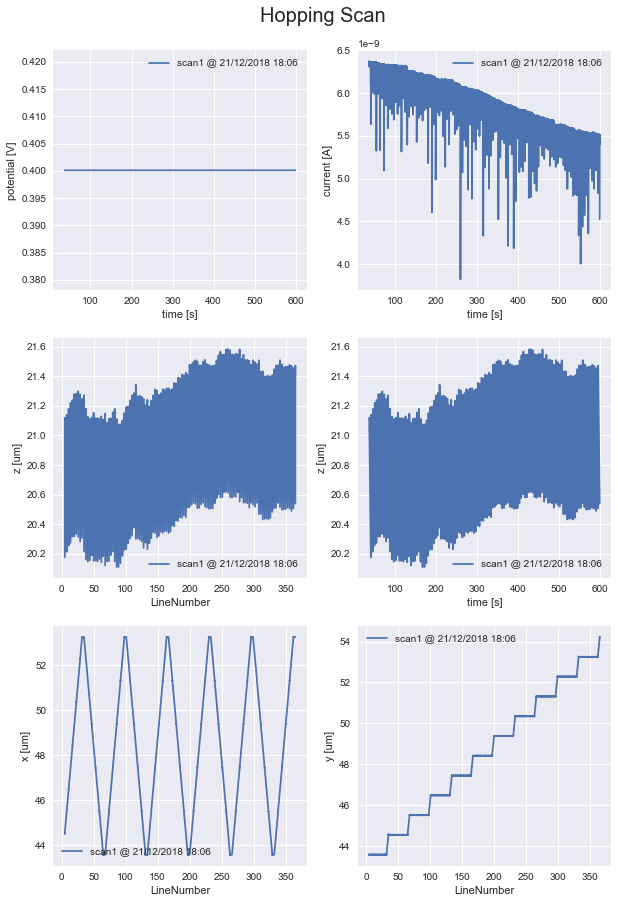

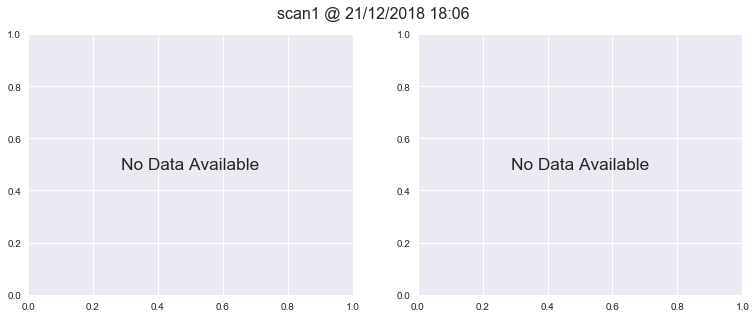

In [121]:
# sel = idxs # slect only last or first
sel = np.arange(0, len(result["LineNumber"])//1) # select all
plots.plot_hopping_scan(result, sel, exp_name, date)

# Make it OOP

In [1]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.experiments.scan import Scan
import numpy as np

%load_ext autoreload
%autoreload 2

In [13]:
scan = Scan(datadir = "S:/UsersData/Martin/2019/02_Feb/22/SICM/scan2",
               exp_name = "scan2")

Avaliable data:
dict_keys(['Y(um)', 'Current1(A)', 'LineNumber', 'dt(s)', 'Z(um)', 'X(um)', 'V1(V)'])
Number of datapoints = (2792130,)
Number of datapoints = 2338000


In [14]:
print("xmax: {}, xmin: {},\nymax: {}, ymin: {}\nxdiff: {}, ydiff: {}".\
      format(
            scan._data["X(um)"].max(),
            scan._data["X(um)"].min(),
            scan._data["Y(um)"].max(),
            scan._data["Y(um)"].min(),
            scan._data["X(um)"].max() - scan._data["X(um)"].min(),
            scan._data["Y(um)"].max() - scan._data["Y(um)"].min()))
print("\nshould be 1.5um in both directions. Quite OK and better than before.")

xmax: 49.659718619, xmin: 48.255867183,
ymax: 47.764519181, ymin: 46.256904813
xdiff: 1.4038514360000036, ydiff: 1.5076143679999987

should be 1.5um in both directions. Quite OK and better than before.


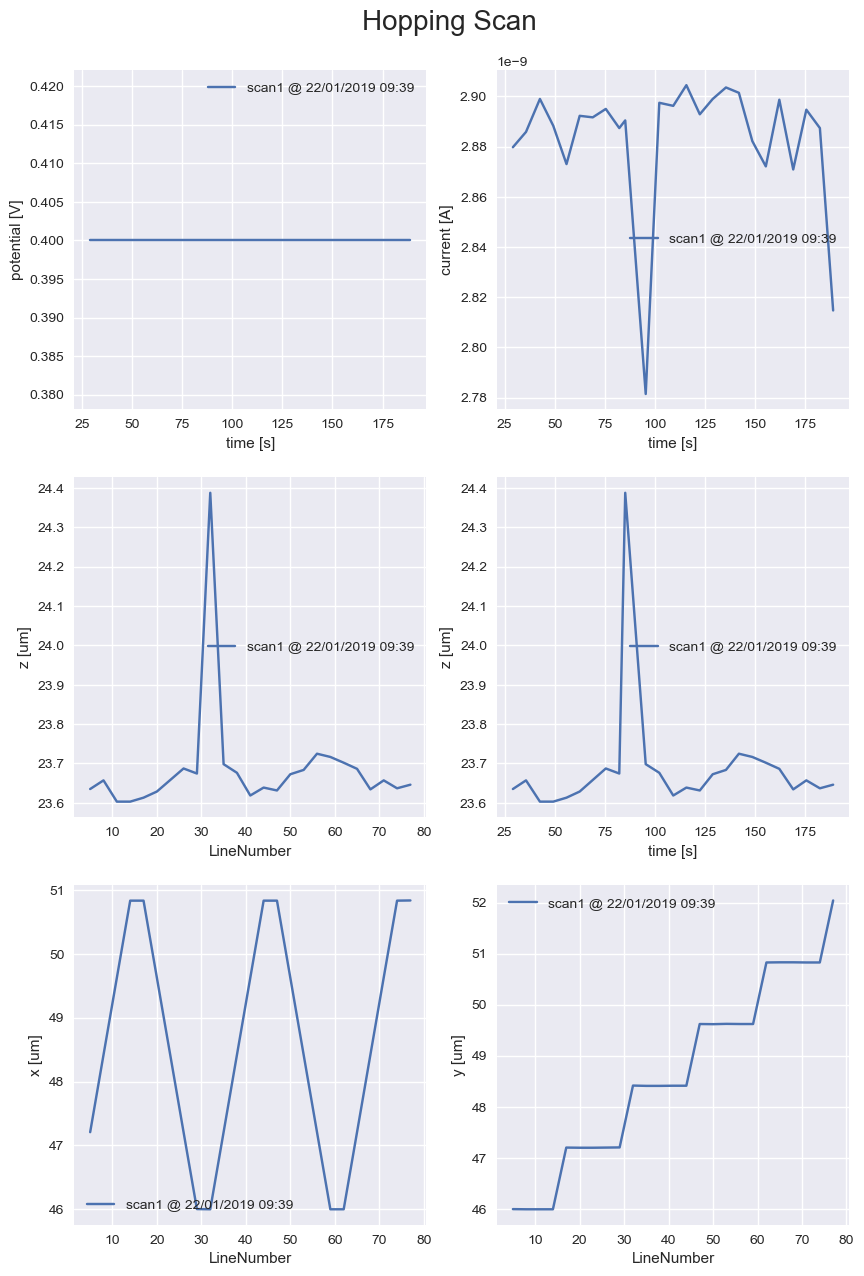

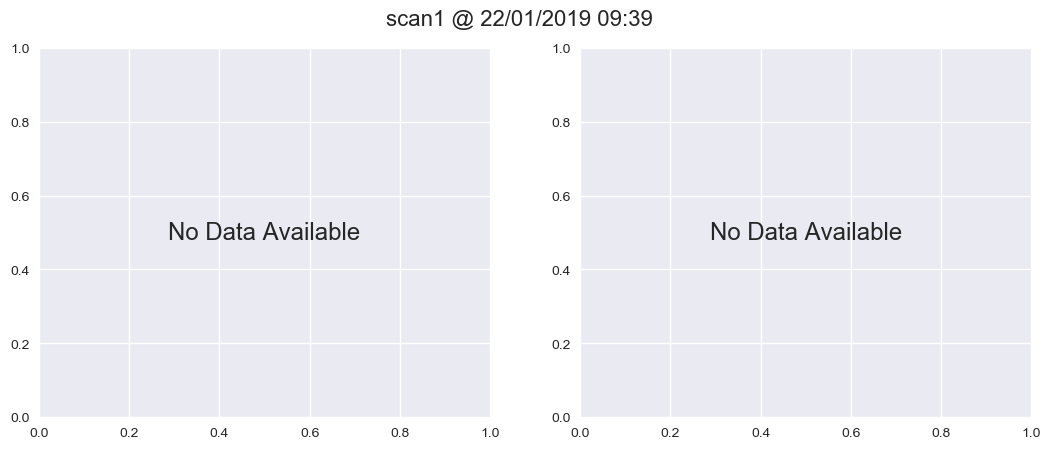

In [186]:
scan.plot_hopping_scan()

Saved figure to S:\UsersData\Martin\2019\01_Jan\22\steph_glass_plasmaclean\10nm\scan6_22012019_1315.pdf.


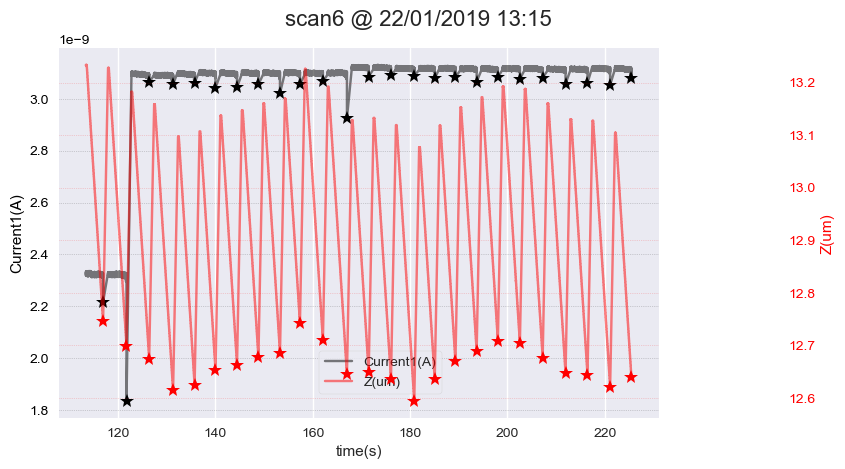

In [212]:
scan.plot_hops()

Saved dataframe to S:/UsersData/Martin/2018/12_Dec/21\scan1_annot.pkl.


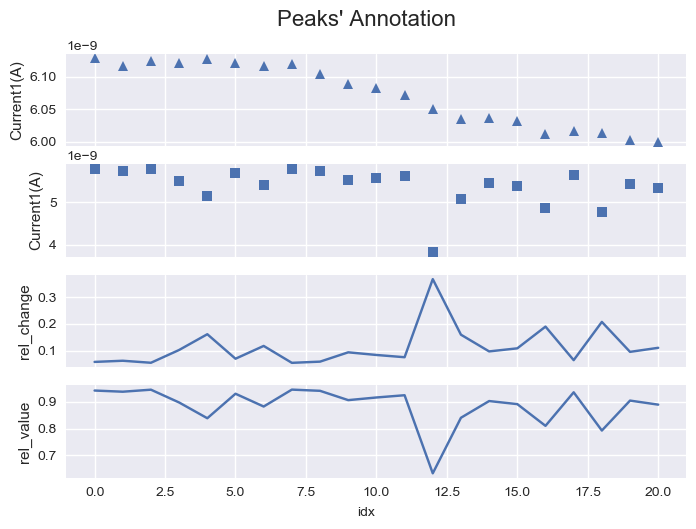

In [138]:
scan.annotate_peaks(sel = [200.0, 300.0], window_size = 250)

# Approach

In [33]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
from sicm.sicm import Approach, Signal
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['LineNumber', 'Current1(A)', 'V1(V)', 'dt(s)', 'Z(um)', 'X(um)', 'Y(um)'])
Number of datapoints = (82721,)
Number of datapoints = 34160


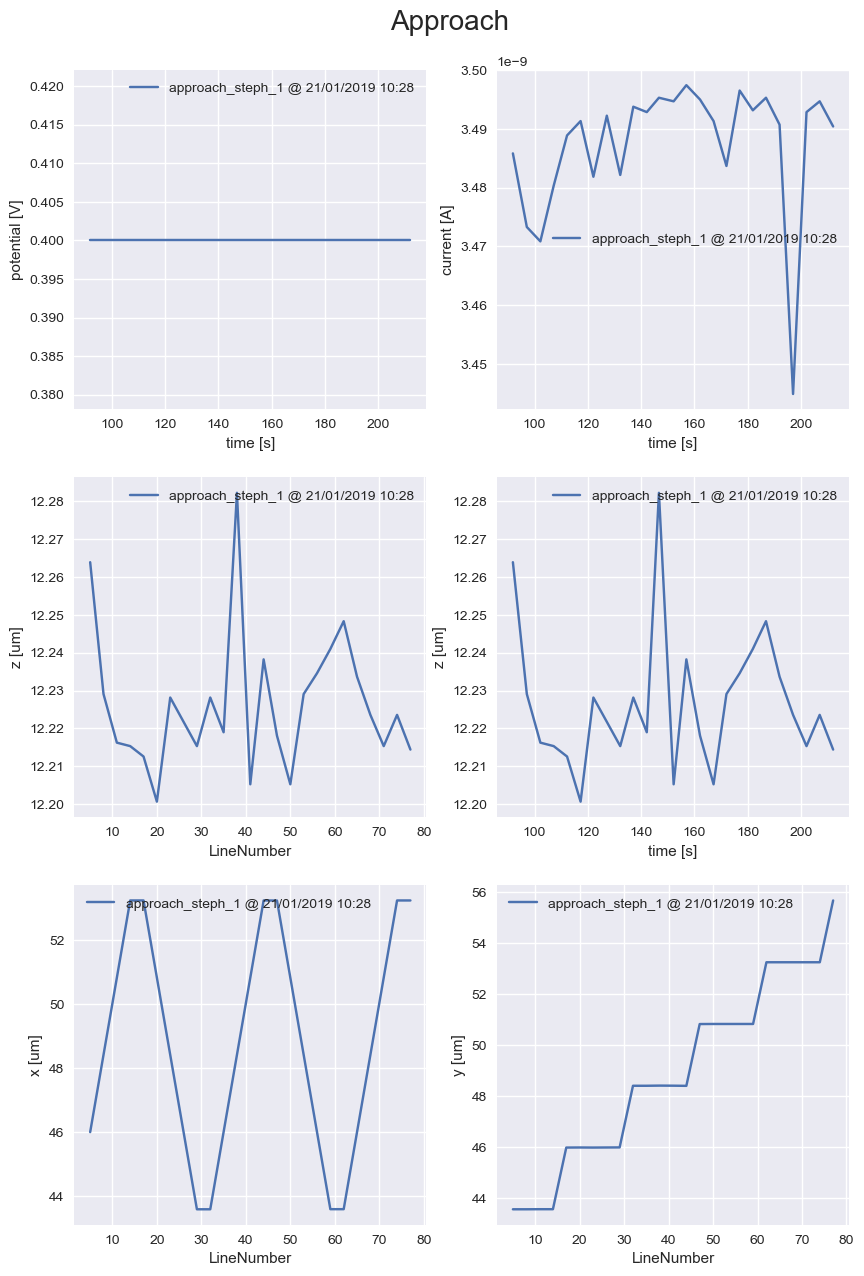

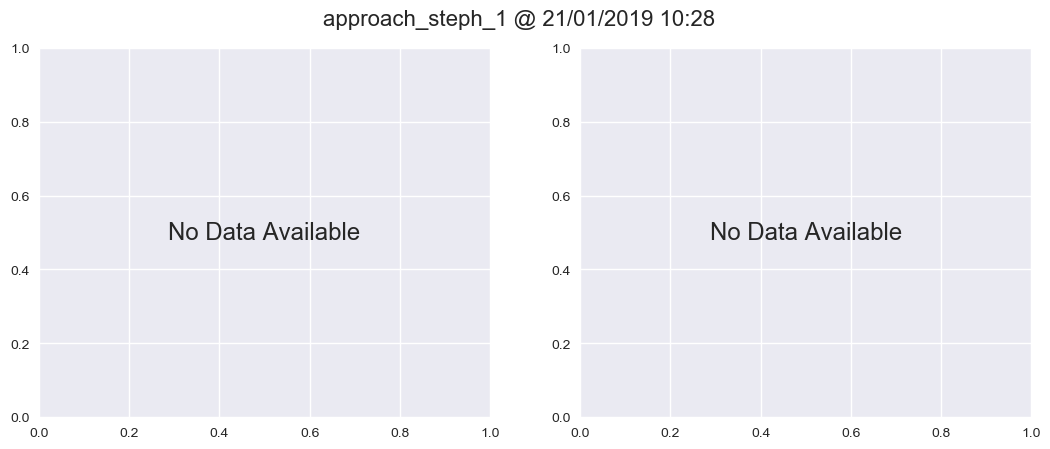

> c:\users\mholub\git\sicm\sicm\measurements\signal.py(88)analyze()
-> if range is not None:
(Pdb) c


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 64 is greater than input length  = 25, using nperseg = 25
  .format(nperseg, input_length))


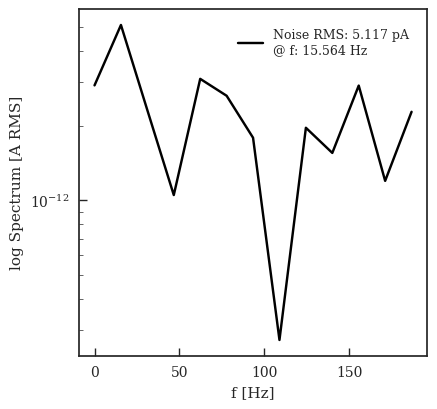

In [37]:
app = Approach(datadir = "S:/UsersData/Martin/2019/01_Jan/21/steph",
              exp_name = "approach_steph_1")
# this is very simplistic but does the job for now.
app.plot()
sig = Signal(x = np.cumsum(app.dsdata["dt(s)"]), 
                      y = app.dsdata["Current1(A)"])
sig.analyze(range = [0., 50.0], what = "psd")

# Getting noise level

In [94]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np
from os import path

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Do it from `Watch Current` Data

In [161]:
datadir = "S:/UsersData/Martin/2019/01_Jan/22/pdms/10nm"
exp_name = "watchcurrent_noisepattern"
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

Avaliable data:
dict_keys(['V1(V)', 'LineNumber', 'Current1(A)', 'dt(s)'])
Number of datapoints = (54798,)


Saved figure to S:\UsersData\Martin\2019\01_Jan\21\steph_plasmacleaned\watchcurrent_noisepattern_psd.pdf.


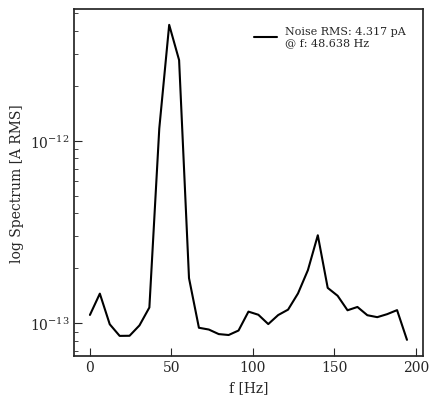

In [164]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
fpath = path.normpath(path.join(datadir, exp_name))
sig.analyze(what = "psd", fpath = fpath, range = [60.0, 130.0])

## Do it from `Approach Data`

In [197]:
datadir = "S:/UsersData/Martin/2019/01_Jan/22/steph_glass_plasmaclean/10nm/app2"
exp_name = "approach_noise_level_newtip"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)
fpath = path.normpath(path.join(datadir, exp_name))

# get idea of range to plot
# plots.plot_hopping_scan(result_, None, exp_name, date)

Avaliable data:
dict_keys(['Z(um)', 'LineNumber', 'Current1(A)', 'V1(V)', 'dt(s)'])
Number of datapoints = (70973,)


Saved figure to S:\UsersData\Martin\2019\01_Jan\22\steph_glass_plasmaclean\10nm\app2\approach_noise_level_newtip_noise.pdf.


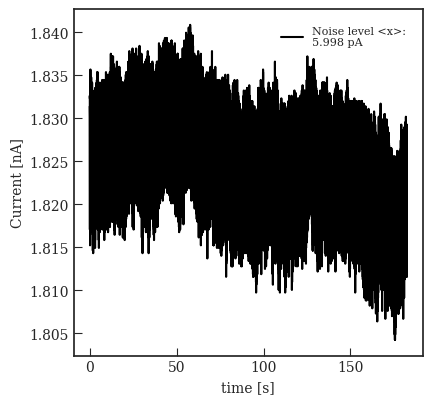

In [199]:
sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.analyze(what = "noise", fpath = fpath)

# Signal

In [9]:
import sys
sys.path.append("..")

from sicm import io
from sicm.sicm import Signal
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['Current1(A)', 'LineNumber', 'V1(V)', 'dt(s)'])
Number of datapoints = (303716,)


C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\mholub\AppData\Local\Continuum\miniconda3\envs\sicm\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


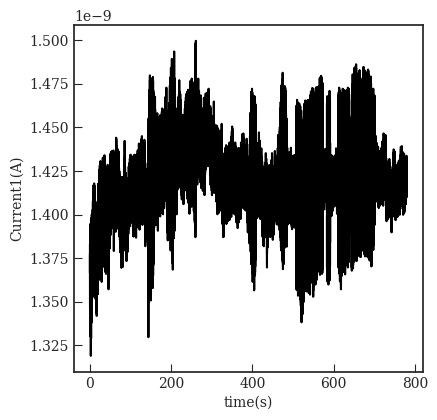

In [141]:
datadir = "S:/UsersData/Martin/2019/01_Jan/21/steph_plasmacleaned"
exp_name = "funny_noise_patterns"


files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

sig = Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.plot("time(s)", "Current1(A)")

# CV

In [136]:
import sys
sys.path.append("..")

from sicm.sicm import CV

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Avaliable data:
dict_keys(['Current1(A)', 'LineNumber', 'V1(V)', 'dt(s)'])
Number of datapoints = (303716,)
Saved figure to S:\UsersData\Martin\2019\01_Jan\21\steph_plasmacleaned\funny_noise_patterns_21012019_1723.pdf.


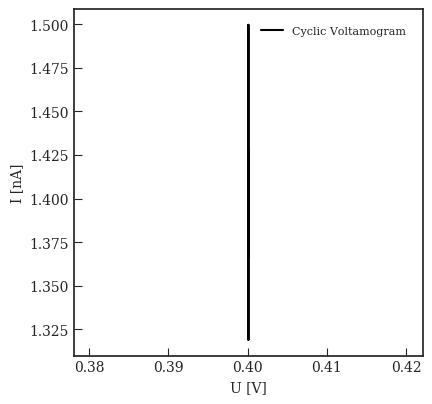

In [139]:
cv = CV(datadir = "S:/UsersData/Martin/2019/01_Jan/21/steph_plasmacleaned",
        exp_name = "funny_noise_patterns")
# this is very simplistic but does the job for now.
cv.plot()